In [1]:
include("optim_lib.jl")
include("lib_func.jl")

# Constants and Parameters
const d1, d2, ds = 2, 8, 1  # Degree range and step
const n, a, b = 2, 1, 3 
const C = a / b  # Scaling constant, C is appears in `main_computation`, maybe it should be a parameter.
const delta, alph = .9 , 2 / 10  # Sampling parameters
f = tref # Objective function

tref (generic function with 1 method)

In [2]:
coeffs_poly_approx = main_gen(f, n, d1, d2, ds, delta, alph, C, 0.5)

dimension Vector space: 6
sample size: 100
dimension Vector space: 10
sample size: 196
dimension Vector space: 15
sample size: 361
dimension Vector space: 21
sample size: 625
dimension Vector space: 28
sample size: 961
dimension Vector space: 36
sample size: 1444
dimension Vector space: 45
sample size: 2116


7-element Vector{Vector{Float64}}:
 [1.5775743154671256, -0.07477374977607579, 0.009937043868680686, 0.2208062192231061, 5.894020861838084e-17, -0.29729468490913047]
 [1.3574770265687761, 0.0723357236811612, -0.048450769435772645, -0.7068227649711525, 0.643752366357123, 9.405039543501241e-17, 0.39361901092848894, 0.11491905974849856, 0.3936190109284887, -0.11576383158617357]
 [1.3182553905425296, 0.03484937234398059, 0.014704455724405575, -0.5661033607701264, -0.07819399084775311, 0.5187718033522505, -2.3719516862925064e-17, 0.3936190109284892, 2.6136039169494975e-16, 0.08985043524807491, 0.39361901092848944, -5.562149890671133e-17, 0.20602822584607966, 4.432824863288252e-17, 0.006897087622533853]
 [1.3285246986084558, 0.02407957950416873, -0.015440369063101067, -0.5575386128081634, -0.01747514846823765, -0.5143547518849798, 0.5124844093346993, 1.1477618810345045e-16, 0.3936190109284895, 3.879703441696937e-16  …  0.08984606344825426, 0.3936190109284894, -1.466092325843366e-16, -0.69199

In [3]:
using DynamicPolynomials, MultivariatePolynomials, HomotopyContinuation, JSON, PlotlyJS, CSV
include("hom_solve.jl")
# Define your main function
@polyvar(x[1:n]) # Define polynomial ring 
function main()
    # @polyvar x[1:n] # Define polynomial ring

    h_x = Float64[]
    h_y = Float64[]

    col = Int[]  # Initialize the color vector

    for (i, d) in enumerate(d1:ds:d2)
        local lambda = support_gen(n, d)[1] # Take support  
        local R = generateApproximant(lambda, coeffs_poly_approx[i], :BigFloat) # Compute the approximant

        # Generate the system for HomotopyContinuation
        local P1 = differentiate(R, x[1])
        local P2 = differentiate(R, x[2])

        local S = RRsolve(n, [P1, P2]) # HomotopyContinuation

        # Define the condition for filtering
        condition(point) = -1 < point[1] < 1 && -1 < point[2] < 1

        # Filter points using the filter function
        filtered_points = filter(condition, S)
        println("Degree: ", d)
        println("Number of solutions: ", length(filtered_points))

        append!(h_x, [point[1] for point in filtered_points]) # For plotting
        append!(h_y, [point[2] for point in filtered_points])
        append!(col, fill(i, length(filtered_points)))
    end
    return h_x, h_y, col
end

h_x, h_y, col = main()

┌ Warning: attempting to remove probably stale pidfile
│   path = /home/georgy/.jlassetregistry.lock
└ @ Pidfile /home/georgy/.julia/packages/Pidfile/DDu3M/src/Pidfile.jl:260


Degree: 2
Number of solutions: 0
Tracking 4 paths...  50%|███████████████▌               |  ETA: 0:00:04



Tracking 4 paths... 100%|███████████████████████████████| Time: 0:00:05
  # paths tracked:                  4
  # non-singular solutions (real):  4 (4)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         4 (4)
Degree: 3
Number of solutions: 2
Tracking 9 paths...  22%|██████▉                        |  ETA: 0:00:14



Tracking 9 paths... 100%|███████████████████████████████| Time: 0:00:04
  # paths tracked:                  9
  # non-singular solutions (real):  9 (5)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         9 (5)
Degree: 4
Number of solutions: 4
Tracking 16 paths...  12%|███▊                          |  ETA: 0:00:27



Tracking 16 paths... 100%|██████████████████████████████| Time: 0:00:03
  # paths tracked:                  16
  # non-singular solutions (real):  16 (16)
  # singular endpoints (real):      0 (0)
  # tot

([0.43024395809078403, -0.4549248212317562, -0.4291017684178984, 0.5210404851575902, 0.47557239424844067, -0.3616145496351936, 0.8436359407002834, -0.6631049811844842, -0.27864219279003144, -0.7416928895576318  …  -0.3080512565339905, -0.5453855822379025, 0.15717909860094698, 0.8578232907417884, 0.3208423643480245, 0.47815328412153124, -0.32660580421200974, -0.6158728360860272, -0.8725375189173619, -0.5015475441811484], [-0.42886147059177904, 0.6532131683174577, -0.30186509377082216, 0.18267853141022666, -0.6393022842697885, 0.4564978900682983, 0.43240986270565707, 0.8073708127286902, 0.764478062256115, 0.26875890822307064  …  -0.8349432956660445, -0.10485788601615594, 0.24458173695347332, -0.5135649641725337, 0.6614353737634513, 0.6514010074794571, -0.6357183493261005, 0.8629343002474475, -0.5561086994304858, -0.6292868091089967], [2, 2, 3, 3, 3, 3, 4, 4, 4, 4  …  7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

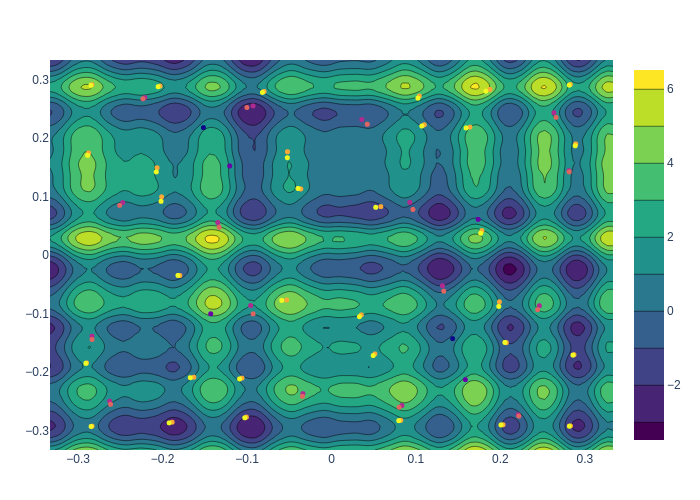

In [17]:
using PlotlyJS

# Define the function and domain

# Generate the grid and evaluate the function
N = 100  # resolution of the grid
x = range(-C, C, length=N)
y = range(-C, C, length=N)
z = [tref([xi, yi]) for xi in x, yi in y]

sc_plt = scatter(x=C* h_x, y=C* h_y, mode="markers", marker_color=col, marker_size=5);


# Create the plot with more contours and smooth transitions
cp = contour(x=x, y=y, z=z, fill=true, levels=50, colorscale="Viridis")

display(plot([cp, sc_plt]))